In [26]:
import dill
import matplotlib.pyplot as plt
# import matplotlib as mpl
# import matplotlib.transforms as transforms
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import math



In [2]:
datafolder = "C:\\Github\\Distraction-Paper\\data\\"
figfolder = "C:\\Github\\Distraction-Paper\\figs\\"
outputfolder = "C:\\Github\\Distraction-Paper\\output\\"

try:
    pickle_in = open(datafolder + "distraction_data.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[modDict, disDict, habDict] = dill.load(pickle_in)

In [36]:
modDict

{'thph1.1': {'rat': 'thph1.1',
  'blue': array([  0.46441472,   0.4676711 ,   0.47095278, ..., 139.68901   ,
         139.68954   , 139.68993   ], dtype=float32),
  'uv': array([  0.16405275,   0.16475719,   0.16543539, ..., 100.403625  ,
         100.40226   , 100.4009    ], dtype=float32),
  'fs': 1017.2526245117188,
  'filt': array([-99.86142 , -99.86044 , -99.85947 , ..., -63.90548 , -63.905273,
         -63.90511 ], dtype=float32),
  'tick': array([1.63840000e-04, 1.00024320e+00, 2.00032256e+00, ...,
         3.84830554e+03, 3.84930562e+03, 3.85030570e+03]),
  'filt_sd': 14.177406,
  'licks': array([ 212.24751104,  212.77048832,  212.86649856, ..., 3079.83302656,
         3079.98097408, 3080.1420288 ]),
  'licks_off': array([ 212.2964992 ,  212.81456128,  212.9174528 , ..., 3079.90003712,
         3080.03897344, 3080.18495488]),
  'distractors': [212.86649856,
   265.21157632,
   273.50450176,
   295.84195584,
   309.45181696000003,
   332.71742464,
   451.04234496000004,
   479.4

In [136]:
d = modDict["thph1.1"]
blue = d["blue"]
filt = d["filt"]
fs = d["fs"]

In [137]:
len(blue)

3917568

In [138]:
nbins = 10 * len(blue) / d["fs"]
print(nbins)

38511.259696974805


In [139]:
nsamples = np.int(len(blue) / nbins)

In [140]:
nsamples

101

In [141]:
maxindex = int(math.floor(len(blue) / 1000.0)) * 1000

new_blue = np.mean(np.reshape(blue[:maxindex], (1000, -1)), axis=0)
new_filt = np.mean(np.reshape(filt[:maxindex], (1000, -1)), axis=0)

In [53]:
len(new_blue)

3917

In [142]:
licks = d["licks"] * fs/1000

In [143]:
binned_licks = np.histogram(licks, bins=range(len(new_blue)+1))

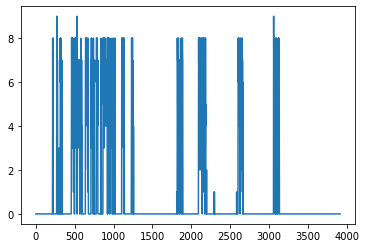

In [144]:
plt.plot(binned_licks[0])

In [145]:
from sklearn import linear_model

In [67]:
reg = linear_model.LinearRegression()
reg.fit(binned_licks[0], new_blue)

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 ... 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

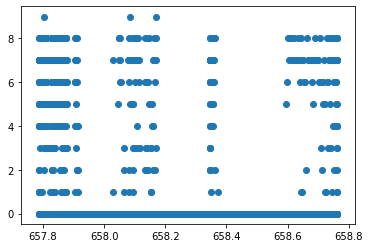

In [61]:
plt.scatter(new_blue, binned_licks[0])

In [62]:
new_blue.shape

(3917,)

In [63]:
binned_licks[0].shape

(3917,)

In [167]:
def make_design_matrix(licks, nback):
    M = np.ones((len(licks), nback))
    
    for i in range(len(licks)):
        try:
            M[i, :] = licks[i:i+nback]
        except: pass
    
    return M

M = make_design_matrix(binned_licks[0], 5)

M = make_design_matrix(new_filt, 5)



In [168]:
reg = linear_model.LinearRegression()
reg.fit(M, binned_licks[0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
reg.coef_

array([-10622.63770279,  18149.04950004, -18400.77670058,  24858.12958023,
       -13983.67449226])

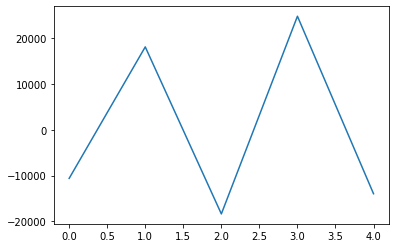

In [170]:
plt.plot(reg.coef_)

In [171]:
shuff_licks = binned_licks[0]
np.random.shuffle(shuff_licks)


In [172]:
print(binned_licks[0])

[3 0 0 ... 0 0 0]


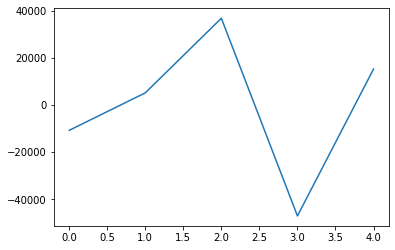

In [173]:
reg = linear_model.LinearRegression()
reg.fit(M, shuff_licks)
plt.plot(reg.coef_)

In [120]:
a = [0, 0, 0, 10, 40, 6]
b = np.random.shuffle(a)
print(b)

None


In [119]:
b